# Markovian-model experiments

See [ReadMe.md](./ReadMe.md) for details of the Markovian model.

## Set up

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Experiment group 1: parameter sweep

### Experimental design

In [2]:
cat(readLines("experiments/parameter-sweep.sh", warn=FALSE), sep="\n")

#!/usr/bin/env bash

cd "$(dirname "${BASH_SOURCE[0]}")"

EXE="../.lake/build/bin/linleios"


function setDefaults {
  Label="NA"
  Lhdr=1
  Lvote=4
  Ldiff=7
  Committee=600
  Quorum=0.75
  Validates=1
  Late=0
  Adversary=0
}

function runModel {
  "$EXE" --l-header $Lhdr \
         --l-vote $Lvote \
         --l-diff $Ldiff \
         --committee-size $Committee \
         --quorum-fraction $Quorum \
         --p-rb-header-arrives 1 \
         --p-eb-validates $Validates \
         --p-late-diffusion $Late \
         --adversary-fraction $Adversary \
         2> /dev/null \
  | yaml2json \
  | jq -r '"'"$Label,$Lhdr,$Lvote,$Ldiff,$Committee,$Quorum,$Validates,$Late,$Adversary,"'" + (."EB efficiency" | tostring)'
}


(

echo $'Label,L_hdr,L_vote,L_diff,Committee size,Quorum fraction,Probability of EB validation,Probability of late diffusion,Adversary fraction,EB efficiency'

setDefaults
Label="Ideal conditions with adversary"
for Adversary in $(seq 0.00 0.01 0.35)
do
  runModel
done


### Read results

In [3]:
parameterSweep <- fread("experiments/parameter-sweep.csv.gz", stringsAsFactors=TRUE)
parameterSweep %>% summary

                                    Label          L_hdr           L_vote 
 Committee and quorum without adversary: 286   Min.   :1.000   Min.   :3  
 Ideal conditions with adversary       :  36   1st Qu.:1.000   1st Qu.:4  
 Non-ideal network without adversary   :1071   Median :1.000   Median :4  
 Protocol parameters without adversary :  30   Mean   :1.011   Mean   :4  
                                               3rd Qu.:1.000   3rd Qu.:4  
                                               Max.   :2.000   Max.   :5  
     L_diff      Committee size   Quorum fraction Probability of EB validation
 Min.   :4.000   Min.   : 500.0   Min.   :0.50    Min.   :0.6000              
 1st Qu.:7.000   1st Qu.: 600.0   1st Qu.:0.75    1st Qu.:0.7200              
 Median :7.000   Median : 600.0   Median :0.75    Median :0.8600              
 Mean   :6.979   Mean   : 630.1   Mean   :0.75    Mean   :0.8495              
 3rd Qu.:7.000   3rd Qu.: 600.0   3rd Qu.:0.75    3rd Qu.:1.0000              
 

### Protocol parameters, without an adversary

In [4]:
label <- "Protocol parameters without adversary"

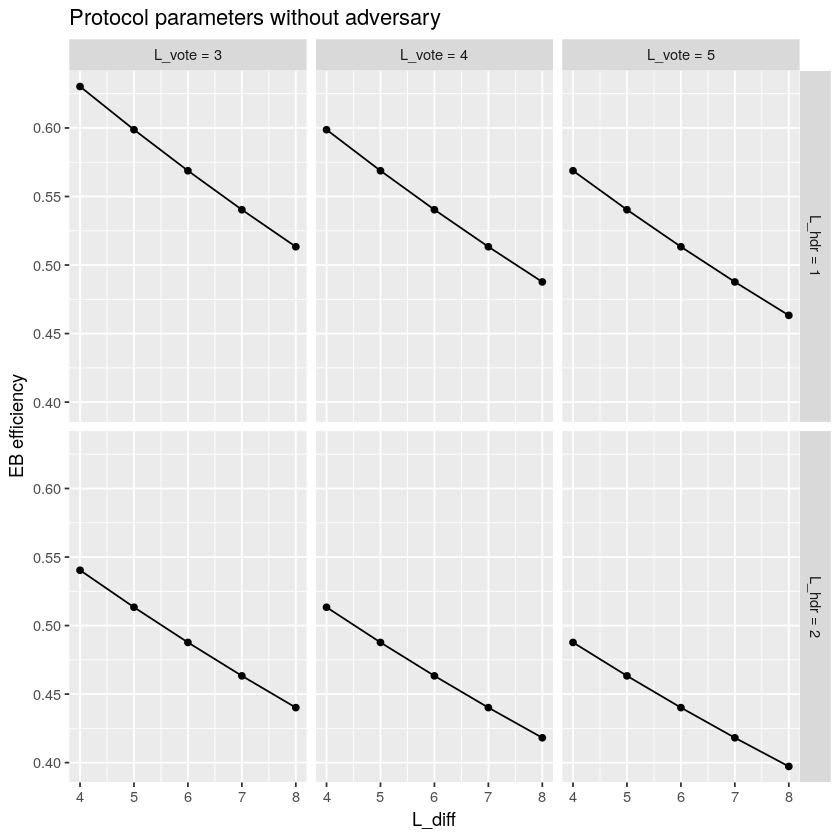

In [5]:
ggplot(
    parameterSweep[
        `Label` == label,
        .(
            `L_hdr`=factor(paste("L_hdr =", `L_hdr`)),
            `L_vote`=factor(paste("L_vote =", `L_vote`)),
            `L_diff`,
            `EB efficiency`
        )
    ],
    aes(x=`L_diff`, y=`EB efficiency`)
) +
    geom_point() +
    geom_line() +
    facet_grid(`L_hdr` ~ `L_vote`) +
    ggtitle(label)

In [6]:
ggsave(paste0("experiments/", label, ".png"), units="in", dpi=150, width=8, height=6)

In [7]:
ggsave(paste0("experiments/", label, ".svg"), units="in", dpi=150, width=8, height=6)

### Non-ideal network, without adversary

In [8]:
label <- "Non-ideal network without adversary"

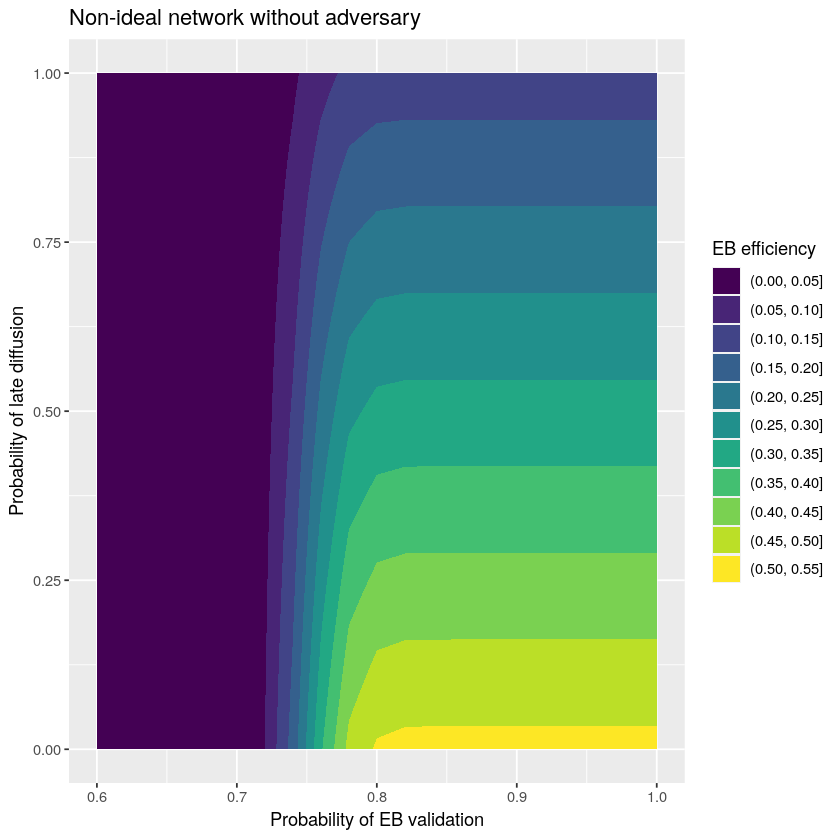

In [9]:
ggplot(
    parameterSweep[
        `Label` == label
    ],
    aes(x=`Probability of EB validation`, y=`Probability of late diffusion`, z=`EB efficiency`)
) +
    geom_contour_filled() +
    guides(fill = guide_legend(title = "EB efficiency")) +
    ggtitle(label)

In [10]:
ggsave(paste0("experiments/", label, ".png"), units="in", dpi=150, width=8, height=6)

In [11]:
ggsave(paste0("experiments/", label, ".svg"), units="in", dpi=150, width=8, height=6)

### Ideal conditions, with adversary

In [12]:
label <- "Ideal conditions with adversary"

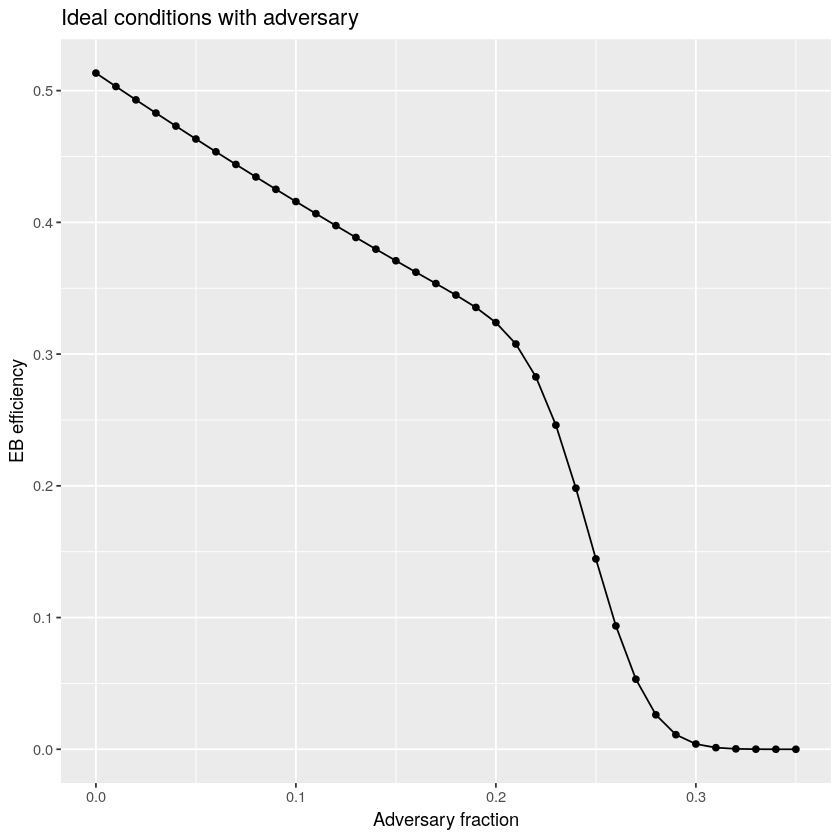

In [13]:
ggplot(
    parameterSweep[
        `Label` == label
    ],
    aes(x=`Adversary fraction`, y=`EB efficiency`)
) +
    geom_point() +
    geom_line() +
    ggtitle(label)

In [14]:
ggsave(paste0("experiments/", label, ".png"), units="in", dpi=150, width=8, height=6)

In [15]:
ggsave(paste0("experiments/", label, ".svg"), units="in", dpi=150, width=8, height=6)

### Committee and quorum, without adversary

In [16]:
label <- "Committee and quorum without adversary"

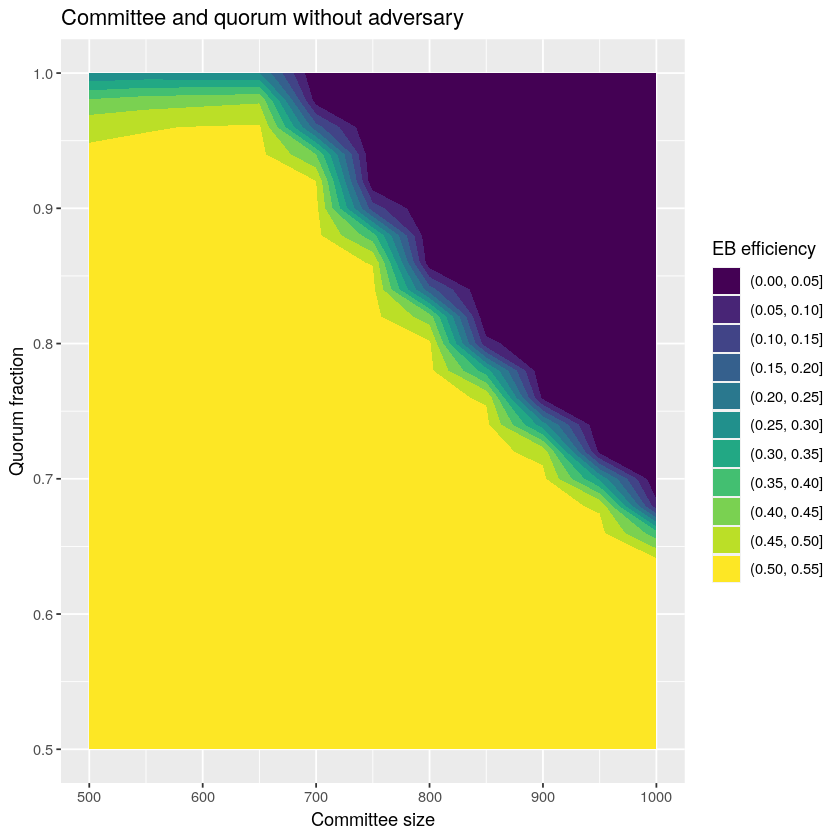

In [17]:
ggplot(
    parameterSweep[
        `Label` == label
    ],
    aes(x=`Committee size`, y=`Quorum fraction`, z=`EB efficiency`)
) +
    geom_contour_filled() +
    guides(fill = guide_legend(title = "EB efficiency")) +
    ggtitle(label)

In [18]:
ggsave(paste0("experiments/", label, ".png"), units="in", dpi=150, width=8, height=6)

In [19]:
ggsave(paste0("experiments/", label, ".svg"), units="in", dpi=150, width=8, height=6)